In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from vis import *
from tickets import *
from minutes import *
from models import *

In [6]:
t = Tickets()
t.add([[1,60]])


In [9]:
m = Models()
prob = m.pickle_picker('load', 0)
exp_t = m.pickle_picker('load', 1)



Pickle for breakup_prob_hist is up to date.
Pickle for expected_tickets is up to date.


In [57]:
def compute_expectation(p, E_N_w,
                        W=300000, ticket_cost=3):

    ticket_cost = 3
    N_t = len(p)
    I = ticket_cost*N_t

    expected_winnings = p*W
    expected_winnings_shared = expected_winnings/(E_N_w + 1)
    expected_net_benefit = expected_winnings_shared - ticket_cost

    print(f"Expected winnings: \t\t{np.sum(expected_winnings):10.2e}")
    print(f"Expected winnings shared: \t{np.sum(expected_winnings_shared):10.2e}")
    print(f"Expected net benefit: \t\t{np.sum(expected_net_benefit):10.2e}")
    print(f"Benefit:Cost ratio B/C: \t{np.sum(expected_winnings_shared)/I:10.3f}")
    print(f"  no. where B/C > 1: \t\t{int(np.sum(expected_winnings_shared > ticket_cost))}")
    print(f"  no. where B/C < 1: \t\t{int(np.sum(expected_winnings_shared < ticket_cost))}")

    return expected_net_benefit

Expected winnings: 		  3.00e+05
Expected winnings shared: 	  4.60e+04
Expected value: 		 -2.13e+05


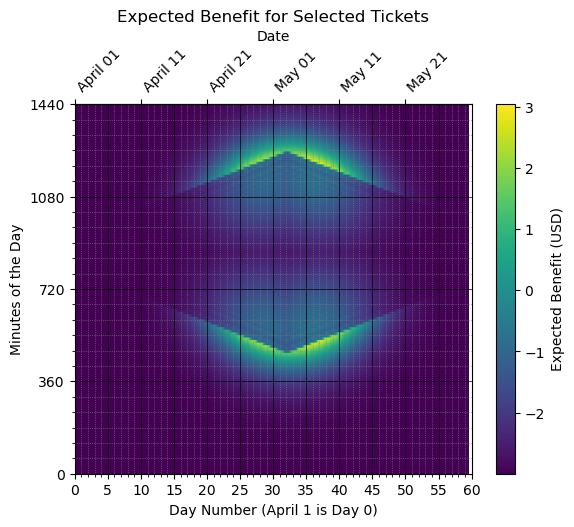

In [ ]:

# expected_winnings = prob*m.winnings
# expected_winnings_shared = expected_winnings/(exp_t + 1)
# expected_benefit = expected_winnings_shared - m.cost

# print(f"Expected winnings: \t\t{np.sum(expected_winnings):10.2e}")
# print(f"Expected winnings shared: \t{np.sum(expected_winnings_shared):10.2e}")
# print(f"Expected benefit: \t\t{np.sum(expected_benefit):10.2e}")

# m.plot(expected_benefit)


compute_expectation(prob, exp_t)

In [28]:
def summarize_array(arr, name):
    summary = {
        'mean': np.nanmean(arr),
        'min': np.nanmin(arr),
        'max': np.nanmax(arr),
        'num_zeros': np.sum(arr == 0),
        'num_nans_or_infs': np.sum(np.isnan(arr) | np.isinf(arr)),
        'sum': np.nansum(arr)
    }
    print(f"Summary for {name}:")
    for key, value in summary.items():
        if isinstance(value, float):
            print(f"{key}: {value:.3e}")
        else:
            print(f"{key}: {value}")
    print("\n")

summarize_array(prob, 'prob')
summarize_array(m.winnings, 'm.winnings')
summarize_array(exp_t, 'exp_t')
summarize_array(expected_value, 'expected_value')

Summary for prob:
mean: 1.156e-05
min: 1.609e-14
max: 1.284e-04
num_zeros: 0
num_nans_or_infs: 0
sum: 9.988e-01


Summary for m.winnings:
mean: 3.000e+05
min: 300000
max: 300000
num_zeros: 0
num_nans_or_infs: 0
sum: 300000


Summary for exp_t:
mean: 4.120e+00
min: 0.000e+00
max: 1.000e+02
num_zeros: 57540
num_nans_or_infs: 0
sum: 3.560e+05


Summary for expected_value:
mean: -2.467e+00
min: -3.000e+00
max: 3.046e+00
num_zeros: 0
num_nans_or_infs: 0
sum: -2.132e+05




In [39]:
type(t.tickets[4])

int

In [62]:
t = Tickets()
t.add([[15,50], [6, 22]])
t.status()

Name: no name
Reference: April 1
Days: 60
Number of tickets: 36720
Cost for all tickets: 110160.0



In [63]:
t_p_and_n = np.zeros((t.N(), 2))
for i in range(t.N()):
    t_p_and_n[i, 0] = m.get_p([t.tickets[i]])
    t_p_and_n[i, 1] = m.get_expected_tickets([t.tickets[i]])

Expected winnings: 		  2.96e+05
Expected winnings shared: 	  4.34e+04
Expected net benefit: 		 -6.67e+04
Benefit:Cost ratio B/C: 	     0.394
  no. where B/C > 1: 		2142
  no. where B/C < 1: 		34578


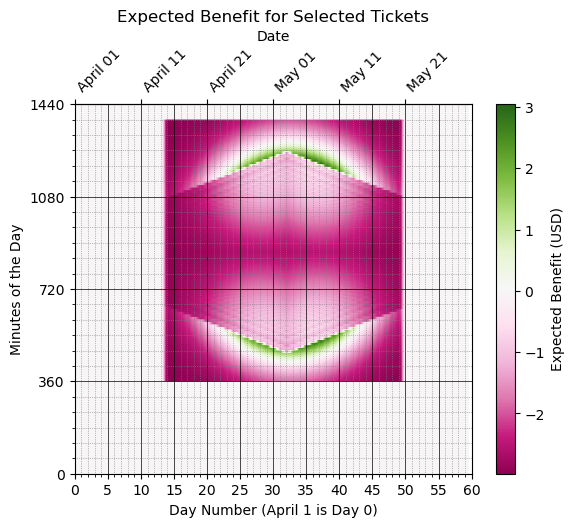

In [64]:
enb = compute_expectation(t_p_and_n[:, 0], t_p_and_n[:, 1])
enb_sparse = Models.data_zeros(t.tickets, enb)
m.plot(enb_sparse)